# ENTRENAR MODELOS

Hasta ahora hemos tratado de modelos de Machine Learning y sus algoritmos de entrenamiento principalmente como una si fuera una caja negra. Si hicimos algunos de los ejercicios de los capítulos anteriores puede que nos haya sorprendido cuanto podemos hacer sin saber nada sobre lo que hay debajo del capó: optimizamos un sistema de regresión, mejoramos un clasificador de imágenes de dígitos e incluso construimos un clasificador de spam desde cero, todo ello sin conocer cómo trabajan realmente. De hecho, en la mayoría de las situaciones no necesitamos conocer los detalles de la implementación.

Sin embargo, tener un buen conocimiento de cómo funcionan las cosas puede ayudarnos rápidamente a centrarnos en el modelo adecuado, el algoritmo de entrenamiento correcto que usar y a configurar adecuadamente los hiperparámetros de nuestra tarea. Comprender qué es lo que hay bajo el capó también nos ayudará a depurar errores y a realizar el análisis de los errores más eficientemente. Por último, la mayoría de los asuntos de este capítulo serán esenciales para en la comprensión, construcción y entrenamiento de redes neuronales (que veremos en la parte II).

En este capítulo, empezaremos revisando el modelo de regresión lineal, uno de los más simples que existen. Discutiremos dos formas muy diferentes de entrenarlos:

+ Usando una ecuación directa "de forma cerrada" que calcula directamente los parámetros del modelo que mejor ajustan el modelo a los datos de entrenamiento (es decir, los parámetros del modelo que minimizan la función de coste sobre el conjunto de entrenamiento.

+ Usando un enfoque de optimización iterativo, llamado *descenso por gradiente* (GD, *gradient descent*) que ajusta gradualmente los parámetros del modelo para minimizar la función de coste sobre el conjunto de entrenamiento, finalmente convergiendo en el mismo conjunto de parámetros del primer método. Veremos algunas variantes del GD que usaremos una y otra vez cuando estudiemos las redes neuronales: Batch BD, mini-batch GD y GD estocástico.

Después veremos la Regresión Polinomial, un modelo más complejo con el que podemos ajustar datasets no lineales. Dado que este modelo tiene más parámetros que la regresión lineal, es más propenso a sobreajustar los datos de entrenamiento, así que veremos como detectarlo si es o no este el caso, usando curvas de aprendizaje, y después veremos varias técnicas de regularización que pueden reducir el riesgo de sobreajuste en el modelo de entrenamiento.

Finalmente, echaremos un vistazo a dos modelos más que son usados generalmente para tareas de clasificación: Regresión Logística y Regresión Softmax.

---
En este capítulo habrá bastantes ecuaciones matemáticas, uso de notacion básica de algebra lineal y cálculo. Para comprender estas ecuaciones necesitaaremos conocer lo que son vectores y matrices. Si no estás familizarizado con estos conceptos, puedes consultar los tutoriales introductorios de álgebra lineal y cáculo disponibles en formato Jupyter Notebook en el material suplementario online. Para aquellos que son verdaderamente alérgicos a las matemáticas, aun deberían seguir en este capítulo y simplemente saltarse las ecuaciones, con la esperanza de que el texto sea le ayude lo suficiente a comprender la mayoría de los conceptos.

---

# Regresión lineal

En el capítulo 2 vimos un modelo de regresión simple de satisfacción de vida: *satisfacción_de_vida = $\theta_0 + \theta_1 \times$ PIB_per_capita*

Este modelo es solo una función lineal de la salida de la característica PIB_per_capita. $\theta_0$ y $\theta_1$ son los parámetros del modelo.

Más generalmente, un modelo lineal hace una predicción calculando simplemente una suma ponderada de las características de entrada, más una constante llamada *término de sesgo* (bias term) o también llamado término de intercepción.

***Predicción del Modelo de Regresión Lineal***

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

Donde, 

+ $\hat{y}$ es el valor predicho.
+ *n* es el número de características
+ $x_i$ es la características iésima
+ $\theta_j$ es el jº parámetro del modelo (incluyendo el termino de sesgo $\theta_0$ y los pesos de las características $\theta_1$, $\theta_2$, ... $\theta_n$).

Esto puede ser descrito mucho más concisamente de forma vectorizada, como se indica a continuación:

***Predicción del Modelo de Regresión Lineal (forma vectorizada)***

$\hat{y} = h_\theta(x) = \theta \cdot x$

Donde:

+ $\theta$ es el `vector parámetro` del modelo, conteniendo el término de sesgo $\theta_0$ y los pesos de las características $\theta_1$ a $\theta_n$
+ $x$ es el vector característica de la instancia, conteniendo de $x_0$ a $x_n$, con $x_0$ siempre igual a 1.
+ $\theta \cdot x$ el producto de los vectores $\theta$ y $x$, el cual es por supuesto igual a $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
+ $h_\theta$ es la función hipótesis, usando el parámetro de modelo $\theta$

En Machine Learning los vectores a menudo se presentan como *vectores columna*, que son matrices 2D con una única columna. Si $\theta$ y $x$ son vectores colulmna, entonces la predicción $\hat{y} = \theta^Tx$, donde $\theta^T$ es la *traspuesta* de $\theta$ (un vector fila en lugar de un vector columna) y $\theta^Tx$ el la matriz multiplicación de $\theta^T$. Por supuesto, es la misma predicción, excepto que ahora se representa como una matriz de celda única en lugar de un valor escalar. En este libro usaremos esta notación.

Perfecto, este es el modelo de Regresión Lineal, ¿y ahora cómo lo entrenamos? Bueno, recordemos que entrenar un modelo significa establecer sus parámetros para que el modelo de ajuste lo mejor posible al conjunto de entrenamiento. Para este propósito, primero necesitamos una medida de cómo de bien (o mal) el modelo se ajusta a los datos de entrenamiento. En el capítulo 2 vimos que la medida de la ejecución más común de un modelo de regresión es error cuadrático medio (RMSE). Por lo tanto, para entrenar un modelo de regresión lineal necesitamos encontrar el valor de $\theta$ que minimina el RMSE. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE (raiz de MSE) y conduce al mismo resultado (porque el valor que minimiza un función también minimiza su raiz cuadrada). Es frecuente que un algoritmo de aprendizaje intente optimizar una función diferente a la medida de rendimiento utilizada para evaluar el modelo final. Esto se debe generalmente a que esa función es más fácil de calcular porque tiene propiedades útiles de diferenciación de las que carece la medida de rendimiento, o porque queremos restringir el modelo durante el entrenamiento, como veremos cuando analicemos la regularización.

El MSE de una hipótesis $h_\theta$ de regresión lineal en un conjunto de entrenamiento **X** se calcula usando la siguiente ecuación:

***Función coste MSE para un modelo de Regresión Lineal***

MSE(**X**, $h_\theta$) = $\frac{1}{m} \sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)})^2 $

La mayoría de estas notaciones ya se presentaron en el capítulo 2. La única diferencia es que escribimos $h_\theta$ en lugar de $h$ para hacer más claro que el modelo está parametrizado por el vector $\theta$. Para simplificar notaciones, solo escribiremos MSE($\theta$) en lugar de MSE(**X**, $h_\theta$).

## La ecuación normal

Para encontrar el valor de $\theta$ que minimina la función de coste, existe una *solución cerrada*, en otras palabras, una función matemática que nos proporciona directamente el resultado. Se denomina la *Ecuación Normal*.

***Ecuación Normal***

$\hat{\theta} = (X^TX)^{-1} \, X^T \, y$

Donde:

+ $\hat{\theta}$ es el valor de $\theta$ que minimiza la función coste.
+ $y$ es el vector de los valores objetivo conteniendo desde $y^1$ a $y^m$

Vamos a a generar algunos datos de aspecto lineal para probar esta ecuación:

In [1]:
# imports comunes
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Hacer las salidas de este notebook estables a través de ejecuciones
np.random.seed(42)

# Hacemos algunos ajustes a los gráficos
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

(0.0, 2.0, 0.0, 15.0)

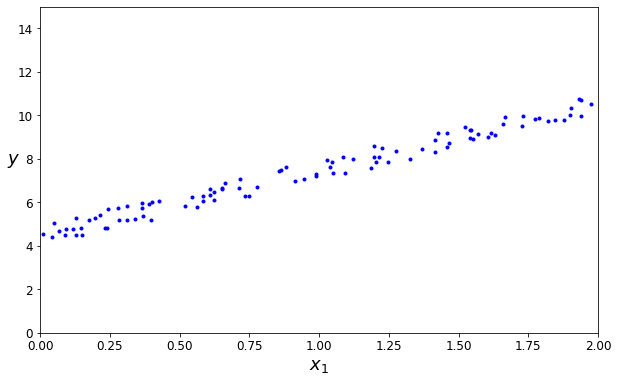

In [3]:
plt.figure(figsize=(10,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

Ahora calculemos $\hat{\theta}$ usando la ecuación normal. Usaremos la función `inv()` del módulo de Algebra Lineal de NumPy para calcular la inversa de una matriz y el método `dot()` para multiplicar una matriz:

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # añade x0 = 1 a cada instancia
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La función que usamos para generar los datos es $y = 4 + 3x_1$ + ruido gaussiano. Veamos cuál es la ecuación encontrada:

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

Hubiéramos esperado $\theta_0 = 4$ y $\theta_1 = 3$, en lugar de $\theta_0 = 4,513$ y $\theta_1 = 2,983$. Suficientemente cerca, pero el ruido hace imposible recuperar los parámetros exactos de la función original.

Ahora podemos hacer predicciones usando $\hat{\theta}$:

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # añade x0 = 1 a cada instancia
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

Vamos a dibujar las predicciones:

(0.0, 2.0, 0.0, 15.0)

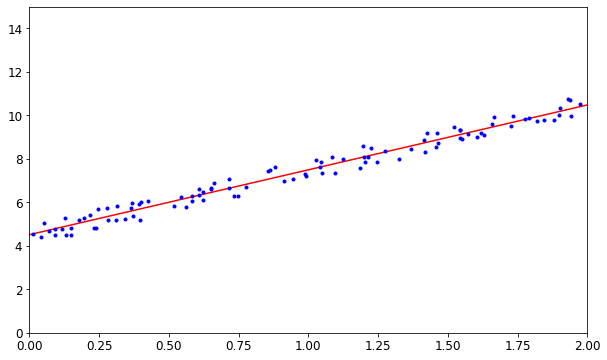

In [7]:
plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

Ejecutar una regresión lineal usando Scikit-Learn es bastante simple (tengamos en cuenta que Scikit Learn separa el termino sesgo, `intercept_`, de los pesos de características, `coef_`):

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

La clase `LinearRegression` se basa en la función `scipy.linalg.lstsq()` (cuyo nombre significa "mínimos cuadrados"), que podríamos llamar directamente:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

Esta función calcula $\hat{\theta} = X^+y$, donde $X^+$ es la *pseudainversa* de $X$ (específicamente la inversa de Moore-Penrose). Podemos usar `np.linalg.pinv()` para calcular la pseudoinversa directamente:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

La pseudoinversa misma se calcula usando una técnica de factorización de matriz estándar llamada Descomposición del Valores Singulares (SVD) que puede descomponer la matriz del conjunto de entrenamiento **X** en la matriz multiplicación de tres matrices $U \,Σ \,V^T$. La pseudoinversa es calculada como $X^+ = V \,Σ \,V^T$. Para calcular la matriz $Σ^+$ el algoritmo toma Σ y establece a cero todos los valores menores que un pequeño valor de umbral, después reemplaza todos los valores distintos de cero con su inversa y, finalmente, traspone la matriz resultante. Este enfoque es más eficiente que calcular la ecuación normal, además de que maneja bien los casos límites: de hecho, la ecuación normal puede no trabajar si la matriz $X^TX$ no es invertible (es decir, singular), tal como si *m < n* o si algunas características son redundantes, pero la pseudoinversa siempre está definida.

## Complejidad computacional

La ecuación normal calcula la inversa de $X^TX$, que es una matriz (*n* + 1) x (*n* + 1) (donde *n* es el númnero de características). La *complejidad computacional* de invertir dicha matriz está típicamente entre $O(n^{2.4})$ y $O(n^3)$, dependiendo de la implementación. En otras palabras, si duplicamos el número de características, multiplicamos el tiempo de cálculo en aproximadamente $2^{2.4}$ a $2^3$.

El enfoque SVD usado por la clase `LinearRegression` de Scikit-Learn está alrededor de $O(n^2)$. Si duplicamos el número de características, multiplicamos el tiempo de computación aproximadamente por 4.

---
Tanto la ecuación normal como el enfoque SVD se vuelven muy lentos cuando el número de características aumenta (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias del conjunto de entrenamiento (son $O(m)$), por lo que manejan eficientemente grandes conjuntos de entrenamiento, siempre que puedan caber en memoria.

---

Además, una vez que hemos entrenado nuestro modelo de Regresión Lineal (usando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto tanto al número de instancias en las que queremos hacer las predicciones como al numero de características. En otras palabras, hacer predicciones en el doble de instancias (o el doble de características) solo tomará aproximadamente el doble de tiempo.

Ahora veremos formas muy diferentes de entrenar un modelo de Regresión Lineal, más adecuados para cuando tengamos un gran número de características o demasiadas instancias de entrenamiento para caber en memoria.

# Descenso de gradiente

El *descenso de gradiente* es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas a un amplio rango de problemas. La idea general del Descenso de Gradiente es ajustar los parámetros iterativamente para minimizar una función de coste.

Supongamos que estamos perdidos en una densa niebla en las montañanas; solo podemos sentir la pendiente del suelo debajo de nuestros pies. Una buena estrategia para llegar rápidamente al fondo del valle es ir cuesta abajo en dirección a la empinada pendiente. Esto es exactamente lo que hace el Descenso de Gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros $\theta$ y va en la dirección del gradiente de descenso. Una vez que el gradiente es cero, ¡hemos alcanzado el mínimo!.

Concretamente, comenzamos rellenando $\theta$ con valores aleatorios (esto se denomina *inicialización aleatorio*) y luego lo mejoramos gradualmente, dando un pequeño paso cada vez, cada paso intentando disminuir la función de coste (es decir, el MSE), hasta que el algoritmo *converja* hacia un mínimo.

![gradient_descent](images/ch04/gradient_descent.png)

Un parámetro importante en el Descenso de Gradiente es el tamaño de los pasos, determinado por el hiperparámetro *tasa de aprendizaje*. Si la tasa de aprendizaje es muy pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que llevará mucho tiempo.

![learning_rate_small](images/ch04/learning_rate_small.png)

Por otro lado, si la tasa de aprendizaje es demasiado alta podemos saltar a través del valle y terminar en el otro lado, posiblemente incluso más arriba que antes. Esto podría hacer que el algoritmo diverja, con valores cada vez más grandes, al no encontrar una buena solución.

![learning_rate_high](images/ch04/learning_rate_high.png)

Finalmente, no todas las funciones de coste tiene la bonita forma de un tazón regular. Pueden tener agujeros, crestas, mesetas y todo tipo de terrenos irregulares, lo que hace que la convergencia al mínimo sea muy difícil. La siguiente figura muestra los dos principales desafíos con el Descenso de Gradiente: si la inicialización aleatorio inicia el algoritmo a la izquiera, convergerá a un *mínimo local*, que no es tan bueno como el *mínimo global*. Si se inicia a la derecha le llevará mucho tiempo atravesar la meseta y si nos detenemos demasiado pronto nunca alcanzaremos el mínimo global.

![gradient_descent_pitfalls](images/ch04/gradient_descent_pitfalls.png)

Afortunadamente, la función de coste MSE para un modelo de Regresión Lineal resulta ser una *función convexa*, lo que significa que si seleccionamos dos puntos en la curva, el segmento de línea que los une nunca cruza la curva. Esto implica que no existe un mínimo local, solo un mínimo global. También es una función continua con una pendiente que nunca cambia abruptamente (técnicamente hablando su derivada es *Lipschitz continua*). Estos dos hechos tienen una gran consecuencia: se garantiza que el Descenso de Gradiente se acerque arbitrariamente al mínimo global (si esperamos lo suficiente y la tasa de aprendizaje no es demasiado alta).

De hecho, la función de coste tiene la forma de cuenco, pero puede ser un cuenco alargado si las características tienen escalas muy diferentes. La siguiente figura muestra un Descenso de Gradiente en un conjunto de entrenamiento donde las características 1 y 2 tienen la misma escala (a la izquiera) y en un conjunto de entrenamiento donde la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha). Como la característica 1 es más pequeña, se necesita un cambio mayor en $\theta_1$ para afectar a la función de coste, por lo que el cuenco se alarga a lo largo del eje $\theta_1$.

![gradient_descent_scaling](images/ch04/gradient_descent_scaling.png)

*figura 4.6*

Como podemos ver, a la izquiera el algoritmo de Descenso de Gradiente va directo hacia el mínimo, alcanzándolo rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global y termina con una larga marcha por un valle casi plano. Eventualmente alcanzará el mínimo, pero le llevará mucho tiempo.

---
Cuando usemo Descenso de Gradiente debemos asegurarnos que todas las características tienen una escala similar (por ejemplo, usando la clase `StandardScaler` de Scikit-Learn) o si no tardará mucho en converger.

---

Este diagrama también ilustra el hecho de que entrenar un modelo significa buscar una combinación de parámetros que minimizan un coste función (sobre el conjunto de entrenamiento). Es una búsqueda en el *espacio de parámetros* del modelo: cuantos más parámetros tiene un modelo, más dimensiones tiene este espacio y más difícil es la búsqueda (buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en tres dimensiones). Afortunadamente, dado que la función de coste en el caso de la Regresión Lineal es convexa, la aguja está simplemente en el fondo del cuenco.

## Descenso de gradiente en lotes (Batch Gradient Descent)

Para implementar Descenso de Gradiente necesitamos calcular el gradiente de una función de coste con respecto a cada parámetro $\theta$ del modelo. En otra palabras, necesitamos calcular cuánto cambiará la función de coste si cambiamos $\theta_j$ solo un poco. Esto se llama *derivada parcial*. Es como preguntar ¿cuál es la pendiente de la montaña bajo mis pies si miro al este? y luego hacemos la misma pregunta mirando al norte (y a sí sucesivamente para todas las demás dimensiones, si podemos imaginarnos un universo con más de tres dimensiones). La siguiente ecuación calcula la derivda parcial de la función de coste con respecto al parámetro $\theta_j$, denotada como $\frac{\partial}{\partial\theta_j} \, MSE(\theta)$.

***Derivada parcial de una función de coste***

![partial_derivatives](images/ch04/partial_derivatives.png)

En lugar de calcular esta derivada parcial individualmente, podemos usar la siguiente ecuación para calcularlas todas de una vez. El vector gradiente, denotado como $\nabla_\theta MSE(\theta)$, contiene todas la derivadas parciales de la función de coste (una por cada parámetro de modelo).

***Vector gradiente de la función de coste***

![gradient_vector](images/ch04/gradient_vector.png)

---
Tengamos en cuenta que esta formula implica cálculos sobre el conjunto de entrenamiento **X** completo, ¡en cada paso del Descenso de Gradiente! Esto es por lo que el algoritmo se denomina *Descenso de Gradiente en lotes*: usa todo el lote completo de datos de entrenamiento en cada paso (en realidad, *Descenso de Gradiente Completo* sería el nombre más adecuado). Como resultado, es terriblemente lento en un conjunto de entrenamiento muy grande (pero veremos algoritmos de Descenso de Gradiente muchos más rápidos en breve). Sin embargo, el Descenso de Gradiente escala bien con el número de características; entrenar un modelo de Regresión Lineal cuando existen cientos de miles de características es mucho más rápido usando Descenso de Gradiente que usando la Ecuación Normal o la descomposición SVD.

---

Una vez que tenemos el vector gradiente, que apunta hacia arriba, sólo tenemos que ir en la dirección opuesta para ir hacia abajo. Esto significa restar $\nabla_\theta MSE(\theta)$ de $\theta$. Aquí es donde entra en juego la tasa de aprendizaje $\eta$: multiplicamos el vector gradiente por $\eta$ para determinar el tamaño de los pasos a bajar.

***Paso del Descenso de Gradiente***

![gradient_descent_step](images/ch04/gradient_descent_step.png)

Veamos una rápida implementación de este algoritmo:

In [12]:
eta = 0.1  # Tasa de aprendizaje
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)    # inicialización aleatoria

for n_iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients


No ha sido tan difícil. Veamos cuál es el resultadod e `theta`:

In [13]:
theta

array([[4.51359766],
       [2.98323418]])

Bien, es exactamente igual que el resultado de la Ecuación Normal. El Descenso de Gradiente ha funcionado perfectamente. Pero ¿qué pasaría si usamos un tasa de aprendizaje `eta` diferente? La siguiente figura muestra los 10 primeros pasos del Descenso de Gradiente usando tres diferentes tasas de aprendizaje (la linea de rayas representa el punto de inicio).

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

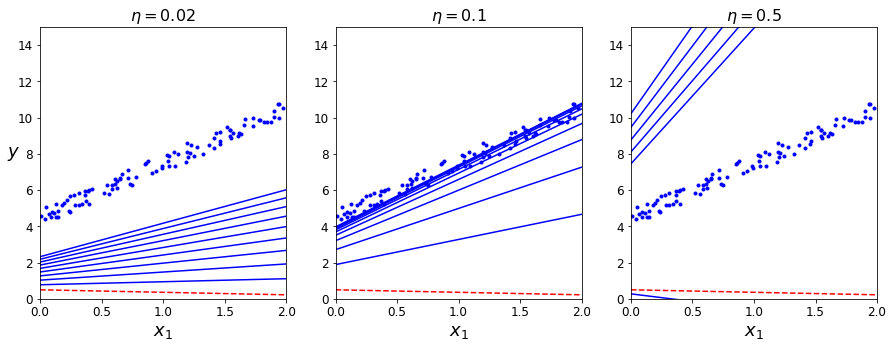

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo finalmente alcanzará la solución, pero le llevará mucho tiempo. En el medio, la tasa de aprendizaje se ve bastante bien: en solo unas pocas iteraciones ya ha convergido a la solución. A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, saltando por todos los lados, de hecho alejándose en cada paso más y más de la solución.

Para encontrar una buena tase de aprendizaje podemos usar *grid search*. Sin embargo, es posible que queramos limitar el número de iteraciones para que grid search pueda eliminar modelos que tarden demasiado en converger.

Quizás nos preguntemos cómo establecer el número de iteraciones. Si es demasiado bajo, aún estaremos demasiado lejos de la solución óptima cuando el algoritmo se detenga, pero si es demasiado alta perderemos el tiempo mientras los parámetros del modelo ya no cambian. Una solución sencilla es establecer una gran cantidad de iteraciones pero interrumpir el algoritmo cuando el descenso de gradiente se vuelve pequeño -es decir, cuando su norma se vuelve más pequeña que un numero pequeño $\epsilon$ (llamado *tolerancia*)- porque esto sucede cuando el Descenso de Gradiente (casi) ha alcanzado el mínimo.

---
**Tasa de convergencia**

Cuando la función de coste es convexa y su pendiente no cambia abruptamente (como es el caso de la función de coste MSE), el Descenso de Gradiente en Lotes con una tasa de aprendizaje fija, eventualmente convergerá a la solución óptima, pero es posible que tengamos que esperar un poco: puede llevar $O(1/\epsilon)$ iteraciones alcanzar el óptimo dentro de un rango $\epsilon$, dependiendo de la forma de la función de coste. Si dividimos la tolerancia por 10 para obtener una solución más precisa, entonces el algoritmo puede tener que ejecutarse unas 10 veces más.

---

## Descenso de Gradiente Estocástico

El principal problema con el Descenso de Gradiente en Lotes es el hecho de que use el conjunto de entrenamiento completo para calcular los gradientes en cada paso, lo que lo hace muy lento cuando dicho conjunto es muy grande. En el extremo opuesto, el *Descenso de Gradiente Estocástico* (SGD) simplemente elige una instancia en el conjunto de entrenamiento en cada paso y calcula los gradientes basado únicamente en esa única instancia. Obviamente, esto hace el algoritmo mucho rápido dado que tiene que manipular muy pocos datos en cada iteración. También permite entrenar en grandes conjuntos de entrenamiento, dado que solo necesita una instancia en memoria en cada iteración (SGD puede ser implementado como un algoritmo *out-of-core*).

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria) este algoritmo es mucho menos regultar que el Descenso de Gradiente en Lotes: en lugar de disminuir suavemente hasta alcanzar el mínimo, la función de coste rebotará arriba y abajo, disminuyendo solo en promedio. Con el tiempo terminará muy cerca del mínimo, pero una vez que llegue allí continuará rebotando, sin asentarse nunca (como se muestra en la siguiente figura). Por tanto, una vez el algoritmo se detiene, los valores finales del parámetro son buenos, pero no óptimos.

![stochastic](images/ch04/stochastic.png)

*figura 4.9*

Cuando la función de coste es muy irregular (como en la *figura 4.6*), esto realmente puede ayudar al algoritmo a saltar fuera del mínimo local, por tanto el Descenso de Gradiente Estocástico tiene una mejor oportunidad de encontrar el mínimo global que el Descenso de Gradiente en Lotes.

Por lo tanto, la aleatoriedad es buena para escapar de óptimos locales, pero mala porque significa que el algoritmo nunca se asentará en el mínimo. Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan siendo grandes (lo que nos ayudará a progresar rápidamente y escapar de los mínimos locales), luego se hacen cada vez más pequeños, permitiendo al algoritmo asentarse en el mínimo global. Este proceso es similar al *recocido simulado*, un algoritmo inspirado en el proceso de recocido en la metalurgia donde el metal fundido se enfría lentamente. La función que determina la tasa de aprendizaje en cada iteración se denomina *aprendizaje programado* (learning schedule). Si la tasa de aprendizaje se reduce muy rápidamente, podemos quedarnos atascados en un mínimo local o incluso terminar congelados en mitad de un mínimo. Si la tasa de aprendizaje se reduce demasiado lentamente, podemos saltar alrededor del mínimo durante un tiempo prolongado y terminar con una solución subóptima si detenemos el entrenamiento demasiado pronto.

El siguiente código implementa el Descenso de Gradiente Estocástico usando una sencillo aprendizaje programado:

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

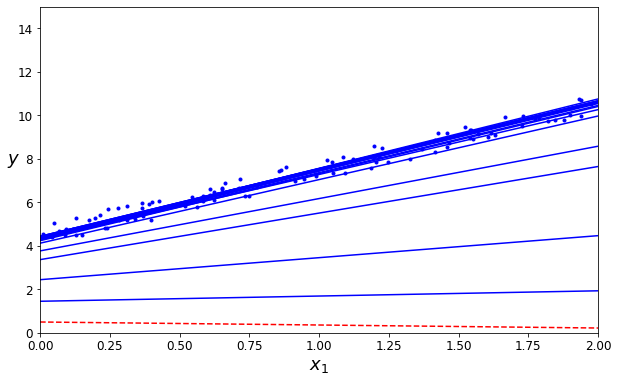

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # hiperparámetros de aprendizaje programado
plt.figure(figsize=(10,6))

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # inicialización aleatoria

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

Por convención, iteramos en rondas de *m* iteraciones; cada ronda se denomina *ciclo* (*epoch*). Mientras que el código del Descenso de Gradiente en Lotes itera 1.000 veces a través del conjunto de entrenamiento completo, este código itera solo 50 veces y alcanca una solución bastante buena:

In [18]:
theta

array([[4.51548062],
       [2.9775157 ]])

En la gráfica anterior se muestran los 20 primeros pasos de entrenamiento (observemos cómo son los pasos de irregulares).

Dado que las instancias son elegidas aleatoriamente, algunas instancias pueden ser elegidas varias veces por ciclo mientras que otras no serán elegidas nunca. Si queremos asegurar que el algoritmo vaya a través de cada instancia en cada ciclo, otro enfoque es mezclar el conjunto de entrenamiento (asegurando mezclar las características de entrada y las etiquetas conjuntamente) y después ir instancia por instancia, luego mezclar otra vez y así sucesivamente. Sin embargo, esto converge generalmente más lentamente.

---
Cuando usamos Descenso de Gradiente Estocástico, las instancias de entrenamiento deben ser independientes e identicamente distribuidas (IID), para asegurar que los parámetros nos llevan hasta el óptimo global, en promedio. Una manera sencilla de asegurar esto es mezclar las instancias durante el entrenamiento (por ejemplo, elegir cada instancia aleatoriamente o mezclar el conjunto de entrenamiento al inicio de cada ciclo). Si no hacemos esto, por ejemplo si las instancias están ordenadas por etiqueta, SGD empezará optimizando por una etiqueta, después la siguiente y así sucesivamente y no se asentará cerca del mínimo global.

---

Para ejecutar la regresión lineal usando SGD con Scikit-Learn, podemos usar la clase `SGDRegressor`, que por defecto optimiza la función de coste de error cuadrático. El siguiente código se ejecuta por un máximo de 1000 ciclos (`max_iter=1000`) o hasta que la pérdida caiga por debajo de $1^{e-3}$, empezando con una tasa de aprendizaje de 0.1 (`eta0=0.1`), usando el aprendizaje programado por defecto (diferente del precedente) y sin usar ninguna regularización (`penalty=None`)

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

Una vez más, encontramos una solución muy cercana a la devuelta por la Ecuación Normal.

## Descenso de Gradiente en mini-lotes

El último algoritmo de Descenso de Gradiente que veremos se denomina *Descenso de Gradiente en mini-lotes*. Es bastante simple de comprender una vez conocemos el Descenso de Gradiente en lotes y estocástico: en cada cada paso, en lugar de calcular los gradientes basado en el conjunto de entrenamiento completo (como en el de lotes) o basado en solo una instancia (como en el estocástico), el Descenso de Gradiente en mini-lotes calcula los gradientes en pequeños conjuntos aleatorios de instancias llamados *mini-lotes*. La principal ventaja de los mini-lotes sobre el estocástico es que podemos obtener un aumento del rendimiento a partir de la optimización hardware de las operaciones con matrices, especialmente cuando usamos GPUs.

El progreso del algoritmo en el espacio de parámetros es menos errático que con el estocástico, especialmente con mini-lotes bastantes grandes. Como resultado, DG en mini-lotes terminará caminando un poco más cerca del mínimo que DG estocástico. Pero, por otro lado, puede ser difícil escapar de mínimos locales (en el caso de problemas que sufren con mínimos locales, a diferencia de la Regresión Lineal, como vimos anteriormente). La siguiente figura muestra el camino tomado por los tres algoritmos de Descenso de Gradiente en el espacio de parámetros durante el entrenamiento. Todos ellos terminan muy cerca del mínimo, pero el camino del DG de lotes en realidad se detiene en el mínimo, mientras que tanto el DG estocástico como el DG en mini-lotes continúan caminando alrededor. Sin embargo, no olvidemos que el DG en lotes toma mucho tiempo en dar cada paso y el DG estocástico y el de mini-lotes también alcanzarían el mínimo si usamos un buen aprendizaje programado.

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # inicialización aleatoria

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.52651397],
       [2.99723869]])

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

(2.6, 4.7, 2.3, 3.9)

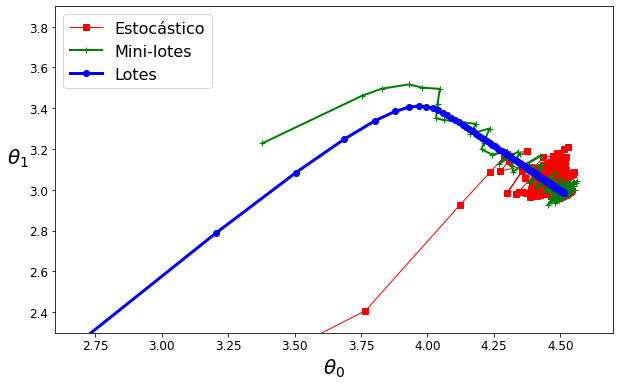

In [24]:
plt.figure(figsize=(10,6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Estocástico")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-lotes")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Lotes")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.6, 4.7, 2.3, 3.9])

Comparemos los algoritmos que hemos discutido hasta ahora para la Regresión Lineal (mientras que la Ecuación Lineal solo puede ejecutar regresiones lineales, los algoritmos de descenso de gradiente pueden ser usados para otros muchos modelos, como veremos más adelante). Recordemos que *m* es el número de instancias de entrenamiento y *n* es el número de características:

![LR_comparation](images/ch04/LR_comparation.png)

*tabla 4.1*


No existe apenas diferencia tras el entrenamiento: todos estos algoritmos terminan con modelos muy similares y realizan predicciones exactamente de la misma manera.

# Regresión Polinomial

¿Qué pasa si nuestros datos son más complejos que una simple línea recta? Asombrosamente, en realidad podemos usar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacer esto añadir poderes de cada característica a nuevas características, luego entrenar un modelo lineal en este conjunto de características extendido.. Esta técnica se denomina *Regresión Polinomial*.

Echemos un vistazo a un ejemplo. Primero, generemos algunos datos no lineales, basados en una simple *ecuación cuadrática* (una ecuación cuadrática tiene la forma $y = ax^2 + bx + c$), más algo de ruido:

In [55]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [56]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

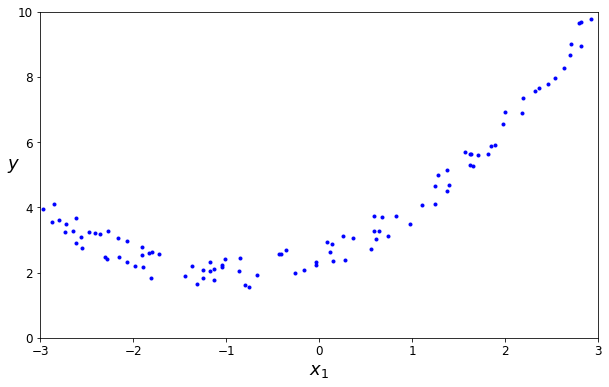

In [57]:
plt.figure(figsize=(10,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

Claramente, una línea recta nunca se ajustará adecuadamente a estos datos. Así que usemos la clase `PolynomialFeatures` para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de 2º grado) de cada característica en el conjunto de entrenamiento como nuevas características (en este caso solo existe una característica):

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [59]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` ahora contiene la caracterítica original de **X** más el cuadrado de esta característica. Ahora podemos ajustar un modelo `LinearRegression` a este datos de entrenamiento extendidos:

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

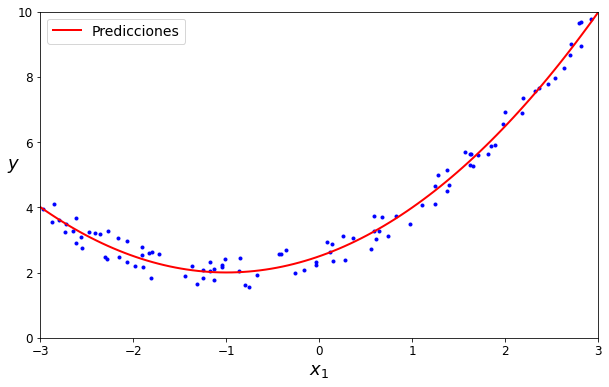

In [61]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(10,6))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

No está mal: el modelo estima $\hat{y} = 0.56x^2_1 + 0.93x_1 + 1.78$ cuando de hecho la función original era $y = 0.5x^2_1 + 1.0x_1 + 2.0$ + ruido gaussiano.

Tengamos en cuenta que cuando hay múltiples características, la regresión polinomial es capaz de encontrar relaciones entre características (que es algo que un modelo de regresión lineal plano no puede hacer). Esto es posible por el hecho de que `PolynomialFeatures` tambien añade todas las combinaciones de características hasta el grado dado. Por ejemplo, si tenemos dos características *a* y *b*, `PolynomialFeautres` con `degree=3` no solo agregaría las características $a^2$, $a^3$, $b^2$ y $b^3$ sino también las combinaciones $ab$, $a^2b$ y $ab^2$.

---
`PolynomialFeatures(degree=d)` transforma una matriz conteniendo *n* características en una matriz conteniendo $\frac{(n + d)!}{d!\,n!}$ características, donde *n!* es el factorial de *n*, igual a 1 x 2 x 3 x ... x *n*. Cuidado con la explosión combinatoria de los números de características.

---

# Curvas de aprendizaje

Si ejecutamos una Regresión Polinomial de grado alto, es probable que ajustamos nuestros datos mucho mejor que con una Regresión Lineal plana. Por ejemplo, la siguiente figura aplica un modelo polinomial de grado-300 a los datos de entrenamiento anteriores, y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinomial de 2º grado). Fijémonos como el modelo polinomial de grado-300 se mueve alrededor para acercarse lo más posible a las instancias de entrenamiento.

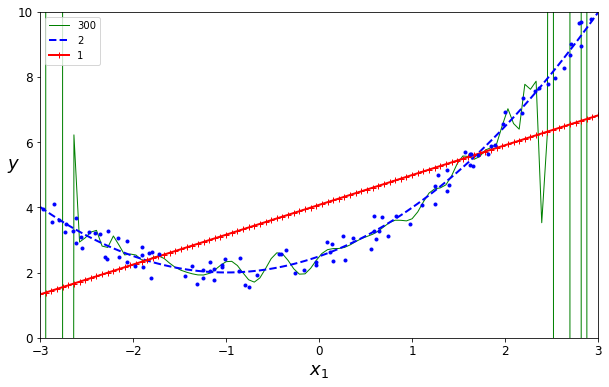

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10,6))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

Por supuesto, este modelo de Regresión Polinomial de grado alto esta severamente sobreajustado a los datos de entrenamiento, mientras que el modelo lineal esta subajustado. En este caso, el modelo que generalizará mejor es el modelo cuadrático. Esto tiene sentido, ya que los datos son generados usando un modelo cuadrático, pero en general no sabremos que función generó los datos, entonces ¿cómo podemos decidir cómo de complejo debe ser nuestro modelo? ¿Cómo podemos decir que nuestro modelo está sobreajustando o subajustando los datos?

En el capítulo 2 usamos la validación cruzada para obtener una estimación de la ejecución de generalización de un modelo. Si un modelo se ejecuta bien en los datos de entrenamiento pero generaliza pobremente de acuerdo a las métricas de validación cruzada, entonces nuestro modelo está sobreajustado. Si la ejecución es pobre en ambos, entonces está subajustado. Esta es la única forma de decir cuándo un modelo es demasiado simple o demasiado complejo.

Otra forma es observar las *curvas de aprendizaje*. estas son gráficas de la ejecución de los modelos en el conjunto de entrenamiento y el conjunto de validación en función del tamaño del conjunto de entrenamiento (o de la iteración de entrenamiento). Para generar estas gráficas, simplemente entrenamos el modelo varias veces en subconjuntos de diferente tamaño del conjunto de entrenamiento. El código siguiente define una función que dibuja las curvas de aprendizaje de un modelo dados algunos datos de entrenamiento:

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="entrenamiento")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validación")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

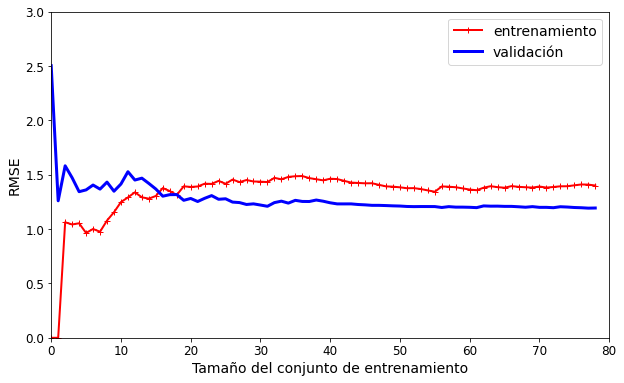

In [64]:
plt.figure(figsize=(10,6))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3]);

Esto merece un poco de explicación. Primero echemos un vistazo a la ejecución en los datos de entrenamiento: cuando solo son una o dos instancias en el conjunto de entrenamiento, el modelo puede ajustarse perfectamente, por eso la curva empieza en cero. Pero según se van añadiendo nuevas instancias al conjunto de entrenamiento, se hace imposible que el modelo ajuste los datos entrenamiento perfectamente, debido tanto a que los datos son ruidoso como porque no son lineales en absoluto. Por lo tanto, el error en el conjunto de entrenamiento aumenta hasta alcanzar una meseta, momento en el que añadir nuevas instancias al conjunto de entrenamiento no hace que el error medio sea mucho mejor o peor.

Ahora echemos un vistazo a la ejecución del modelo en los datos de validación. Cuando el modelo es entrenado en muy pocas instancias de entrenamiento, es incapaz de generalizar adecuadamente, por lo que el error de validación es inicialmente bastante grande. Luego, a medida que el modelo ve más ejemplos de entrenamiento, aprende y, por lo tanto, el error de validación disminuye lentamente. Sin embargo, una vez más una línea recta no puede hacer un buen trabajo modelando los datos, por tanto el error termina en una meseta, muy cerca de la otra curva.

Estas curvas de aprendizaje son típicas de un modelo subajustado. Ambas curvas han alcanzado una meseta, están cercanas y bastante altas.

---
Si nuestro modelo está subajustando los datos de entrenamiento, añadir más ejemplos de entrenamiento no ayudará. Necesitamos usar un modelo más complejo o proponer características mejores.

---

Ahora veamos las curvas de aprendizaje de un modelo polinomial de 10º grado en los mismos datos:

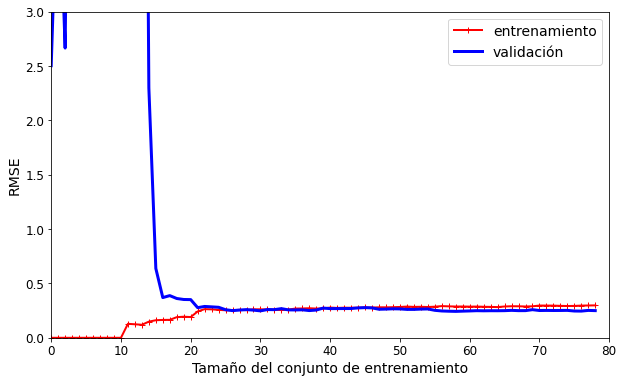

In [65]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.figure(figsize=(10,6))
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]);

Estas curvas de aprendizaje parece un poco como las anteriores, pero tienen dos importantes diferencias:

- El error en los datos de entrenamiento es mucho menor que con el modelo de Regresión Lineal.
- Hay un *gap* entre las curvas. Esto significa que el modelo funciona significativamente mejor en los datos de entrenamiento que en los datos de validación, que es el sello distintivo de un modelo sobreajustado. Sin embargo, si usaramos un conjunto de entrenamiento mucho más grande, las dos curvas continuarían acercándose. *En el ejemplo del libro es como se describe en este punto. En este notebook no parece existir este gap*

---
Una forma de mejorar un modelo soberajustado es proporcionarle más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

---